# Movie Review Data - Statistics

In [1]:
import pandas as pd
movies = pd.read_csv("fandango_score_comparison.csv")
movies

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
5,The Water Diviner (2015),63,62,50,6.8,7.2,4.5,4.0,3.15,3.10,...,3.60,3.0,3.0,2.5,3.5,3.5,34,39373,397,0.5
6,Irrational Man (2015),42,53,53,7.6,6.9,4.0,3.5,2.10,2.65,...,3.45,2.0,2.5,2.5,4.0,3.5,17,2680,252,0.5
7,Top Five (2014),86,64,81,6.8,6.5,4.0,3.5,4.30,3.20,...,3.25,4.5,3.0,4.0,3.5,3.5,124,16876,3223,0.5
8,Shaun the Sheep Movie (2015),99,82,81,8.8,7.4,4.5,4.0,4.95,4.10,...,3.70,5.0,4.0,4.0,4.5,3.5,62,12227,896,0.5
9,Love & Mercy (2015),89,87,80,8.5,7.8,4.5,4.0,4.45,4.35,...,3.90,4.5,4.5,4.0,4.5,4.0,54,5367,864,0.5


# Histogram of Fandango Stars Ratings

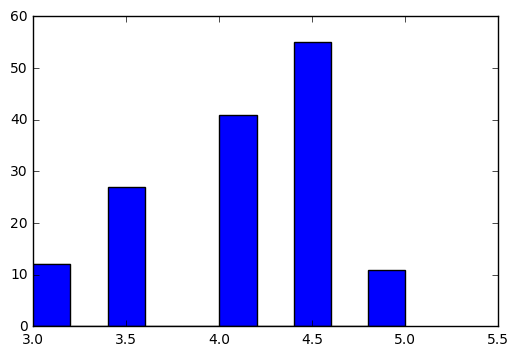

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(movies['Fandango_Stars'])
plt.show()

# Compute Means

In [3]:
import numpy
Fandango_mean = movies['Fandango_Stars'].mean()
Metacritic_mean = movies['Metacritic_norm_round'].mean()

Fandango_median = movies['Fandango_Stars'].median()
Metacritic_median = movies['Metacritic_norm_round'].median()

Fandango_STD = numpy.std(movies['Fandango_Stars'])
Metacritic_STD = numpy.std(movies['Metacritic_norm_round'])

print(Fandango_mean, Metacritic_mean, Fandango_median, Metacritic_median, Fandango_STD, Metacritic_STD)



(4.089041095890411, 2.9726027397260273, 4.0, 3.0, 0.5385321612699531, 0.9875610297038636)


# Scatter Metacritic vs Fandango

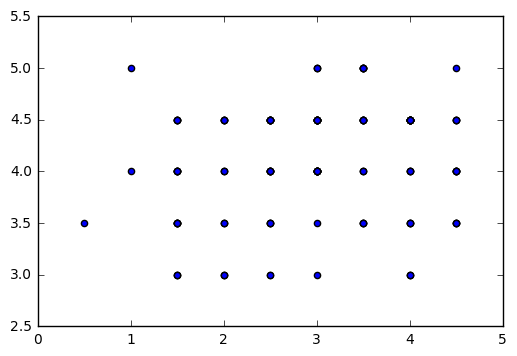

                             FILM  RottenTomatoes  RottenTomatoes_User  \
0  Avengers: Age of Ultron (2015)              74                   86   
1               Cinderella (2015)              85                   80   
2                  Ant-Man (2015)              80                   90   
3          Do You Believe? (2015)              18                   84   
4   Hot Tub Time Machine 2 (2015)              14                   28   

   Metacritic  Metacritic_User  IMDB  Fandango_Stars  Fandango_Ratingvalue  \
0          66              7.1   7.8             5.0                   4.5   
1          67              7.5   7.1             5.0                   4.5   
2          64              8.1   7.8             5.0                   4.5   
3          22              4.7   5.4             5.0                   4.5   
4          29              3.4   5.1             3.5                   3.0   

   RT_norm  RT_user_norm   ...     RT_norm_round  RT_user_norm_round  \
0     3.70    

D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [4]:
plt.scatter(x = movies['Metacritic_norm_round'], y = movies['Fandango_Stars'])
plt.show()

movies['fm_diff'] = abs(movies['Metacritic_norm_round'] - movies['Fandango_Stars'])
movies.sort('fm_diff', ascending = False)
print(movies.head(5))

Due to the incremental ratings (on half-star basis) the scatterplot looks artificially regular. 

In [7]:
from scipy import stats

r_value, x = stats.pearsonr(movies['Fandango_Stars'], movies['Metacritic_norm_round'])

slope, intercept, r_value, p_value, std_err = stats.linregress(movies['Metacritic_norm_round'], movies['Fandango_Stars'])

pred_y = slope*3.0 + intercept

print(slope, intercept, r_value, p_value, std_err)

(0.097311077973928267, 3.7997739188994188, 0.17844919073895882, 0.031161516228524384, 0.04471354465679829)


Perform linear regression to find slope/intercept between Metacritic and Fandango scores

# Linear regression plotted over scatterplot

<function matplotlib.pyplot.show>

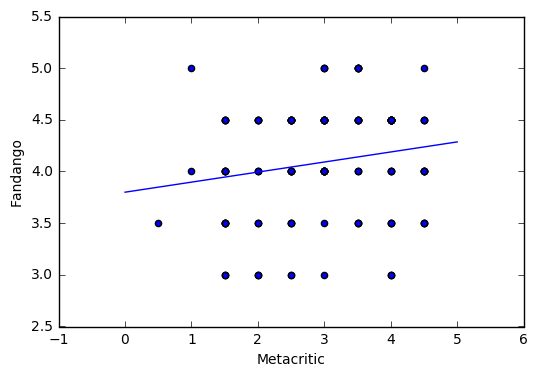

In [11]:
pred_y2 = slope*4.0 + intercept
pred_y0 = intercept
pred_y5 = slope*5.0 + intercept
y = [pred_y0, pred_y5]
x = [0.0, 5.0]
plt.scatter(x = movies['Metacritic_norm_round'], y = movies['Fandango_Stars'])
plt.plot(x,y)
plt.xlabel('Metacritic')
plt.ylabel('Fandango')
plt.show

This plot shows that on average Fandango scores are higher than Metacritic scores